In [1]:
# https://youtu.be/dczkYlOM2sg

In [2]:
# in the Julia REPL
# > using IJUlia
# > installkernel("Julia 4 threads", env = Dict("JULIA_NUM_THREADS"=>"4"))
# Then, start jupyter

In [3]:
using StaticArrays, Plots, StatsBase

In [4]:
function birthday_problem(n)
   success = 0
    for t = 1:n
        monthes=rand(1:12,20)
        counts = [sum(monthes.==i) for i = 1:12]
        success += sum(counts.==2)==4 && sum(counts.==3)==4
    end
    success/n
end

birthday_problem (generic function with 1 method)

In [5]:
@time birthday_problem(10_000_000)

 12.507731 seconds (284.32 M allocations: 15.392 GiB, 11.69% gc time)


0.0010788

In [6]:
function birthday_distribution(t)
    v = zeros(t)
    for i in 1:t
       v[i]  = birthday_problem(50_000)
    end
    h = fit(Histogram, v, .0005:0.0001:0.0015)
end

birthday_distribution (generic function with 1 method)

In [7]:
h = birthday_distribution(100)

Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  0.0005:0.0001:0.0015
weights: [0, 1, 0, 13, 25, 30, 19, 10, 2, 0]
closed: left
isdensity: false

In [8]:
sum(h.weights)

100

In [9]:
total_runs = 1_000*50_000
println("total runs $total_runs. whch is a lot")
result = birthday_distribution(1000)

total runs 50000000. whch is a lot


Histogram{Int64, 1, Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}
edges:
  0.0005:0.0001:0.0015
weights: [0, 3, 16, 99, 180, 275, 235, 138, 38, 12]
closed: left
isdensity: false

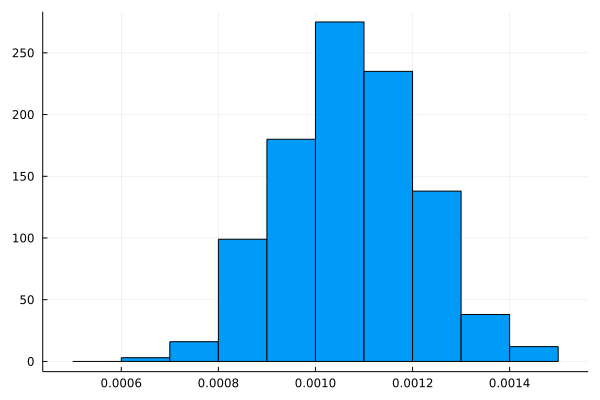

In [10]:
plot(result, legend = false)

In [11]:
function birthday_problem(n)
   success = 0
    for t = 1:n
        monthes=  @SVector [rand(1:12) for i in  1:20]
        counts = [sum(monthes.==i) for i = 1:12]
        success += sum(counts.==2)==4 && sum(counts.==3)==4
    end
    success/n
end

birthday_problem (generic function with 1 method)

In [12]:
@time birthday_problem(10_000_000)

  3.469712 seconds (34.32 M allocations: 2.577 GiB, 9.83% gc time)


0.0010646

In [13]:
function birthday_problem(n)
   success = 0
    for t = 1:n
        monthes =  @SVector [rand(1:12) for i in  1:20]
        counts = @SVector [sum(monthes.==i) for i = 1:12]
        success += sum(counts.==2)==4 && sum(counts.==3)==4
    end
    success/n
end

birthday_problem (generic function with 1 method)

In [14]:
@time birthday_problem(10_000_000)

  1.249470 seconds


0.0010726

In [15]:
using FLoops

In [16]:
function birthday_problem_floops(t, ncores)
    v = 0
    @floop ThreadedEx(basesize = t÷ncores) for _ in 1:t
        monthes =  @SVector [rand(1:12) for i in  1:20]
        counts = @SVector [sum(monthes.==i) for i = 1:12]
        success = sum(counts.==2)==4 && sum(counts.==3)==4
        @reduce (v += success)
    end
    return v/t
end

birthday_problem_floops (generic function with 1 method)

In [17]:
@time birthday_problem_floops(10_000_000,1)

  1.262442 seconds (448 allocations: 30.953 KiB, 0.56% compilation time)


0.0010514

In [18]:
@time birthday_problem_floops(10_000_000,2)

  0.770727 seconds (10.54 k allocations: 599.990 KiB, 1.47% compilation time)


0.0010669

In [19]:
@time birthday_problem_floops(10_000_000,4)

  0.882407 seconds (30 allocations: 2.078 KiB)


0.0010627

In [20]:
# @time birthday_problem_floops(10_000_000,5)

In [21]:
# @time birthday_problem_floops(10_000_000,10)

In [22]:
@time birthday_problem_floops(1_000_000_000,4)

0.001058946

 61.570790 seconds (31 allocations: 2.109 KiB)


In [34]:
function birthday_distribution(t)
    v = zeros(t)
    for i in 1:t
       v[i]  = birthday_problem(50_000)
    end
    h = fit(Histogram, v, .0005:0.0001:0.0015)
end

birthday_distribution (generic function with 1 method)

In [42]:
function birthday_distribution2(t)
    v = zeros(Float32, t)
    for i in 1:t
       v[i]  =convert(Float32,  birthday_problem(50_000))
    end
    h = fit(Histogram, v, .0005:0.0001:0.0015)
end


function birthday_distribution_floops(t, ncores)
    bins = .0005:0.0001:0.0015
    empty_hist = birthday_distribution(0)
    @floop ThreadedEx(basesize = 1) for _ in 1:ncores
        @reduce(h = merge(empty_hist, birthday_distribution(t/ncores)))
    end
   
    return h
end

birthday_distribution_floops (generic function with 1 method)

In [43]:
h = birthday_distribution_floops(1000,10)
sum(h.weights)

LoadError: MethodError: no method matching zeros(::Float64)
[0mClosest candidates are:
[0m  zeros([91m::Tuple{Vararg{Union{Integer, AbstractUnitRange}}}[39m) at C:\Users\garla\AppData\Local\Programs\Julia-1.7.2\share\julia\base\array.jl:522
[0m  zeros([91m::Type{MVector{N}}[39m) where N at C:\Users\garla\.julia\packages\StaticArrays\NQjQM\src\MVector.jl:25
[0m  zeros([91m::Type{SVector{N}}[39m) where N at C:\Users\garla\.julia\packages\StaticArrays\NQjQM\src\SVector.jl:32
[0m  ...